In [1]:
import math
from math import atan2

import numpy as np
from scipy.linalg import norm
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
data = np.load('../real_data/uscities.npy')
num_nodes = data.shape[0]

In [3]:
k_num = 50
eta = 0.05

In [4]:
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [5]:
def get_rotation_matrix(theta):
    
    return np.array([[math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]])

In [6]:
# to plot the data generation procedure
eta = 0.05
outlier_style = 'multi_normal1'
random_seed = 20
split = 1
patch_indices = np.load('../real_data/us_patch_indices_k50_thres6.npy')
added_noise_x = np.load('../real_data/us_added_noise_x_k50_thres6_100eta'+str(int(100*eta))+'seed'+str(random_seed)+'.npy')
added_noise_y = np.load('../real_data/us_added_noise_y_k50_thres6_100eta'+str(int(100*eta))+'seed'+str(random_seed)+'.npy')
angles_gt = np.load('../real_data/us_angles_gt_k50_thres6_100eta'+str(int(100*eta))+outlier_style+'seed'+str(random_seed)+'.npy')
adj_obs = np.load('../real_data/us_adj_obs_k50_thres6_100eta'+str(int(100*eta))+outlier_style+'seed'+str(random_seed)+'.npy')
angles_pred = np.load('../uscities_pred/GNNSync_k50_thres6_100eta'+str(int(100*eta))+outlier_style+'seed'+str(random_seed)+'split'+str(split)+'.npy')

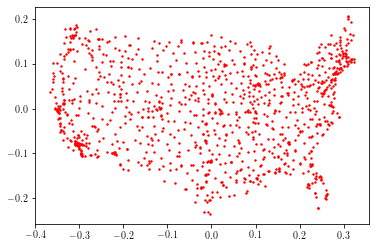

In [8]:
plt.scatter(data[:, 0], data[:, 1], s=2, c='red')
plt.savefig('../uscities_pipeline_plots/us_data.pdf', format='pdf')
plt.show()

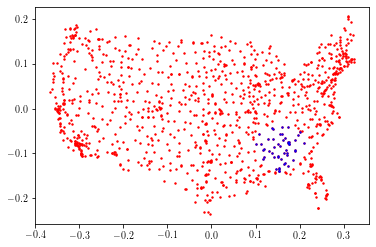

In [9]:
i = 0
plt.scatter(data[:, 0], data[:, 1], s=2, c='red')
plt.scatter(data[patch_indices[i], 0], data[patch_indices[i], 1], s=2, alpha=0.8, c='blue')
plt.savefig('../uscities_pipeline_plots/us_k50_thres6_noiseless_patch'+str(i)+'.pdf', format='pdf')
plt.show()

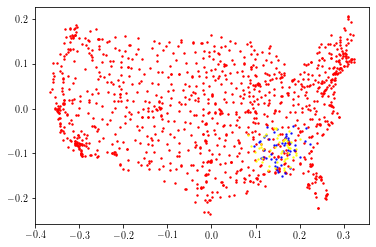

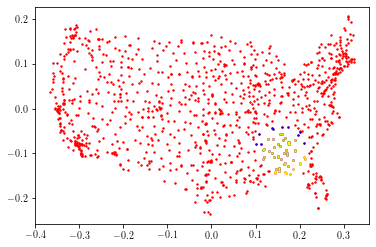

In [10]:
plt.scatter(data[:, 0], data[:, 1], s=2, c='red')
i = 0
noisy_patch_i = data[patch_indices[i]].copy()
noisy_patch_i[:, 0] += added_noise_x[i]
noisy_patch_i[:, 1] += added_noise_y[i]
rotated_coordinates = np.dot(get_rotation_matrix(angles_gt[i]), noisy_patch_i.T).T
plt.scatter(noisy_patch_i[:, 0], noisy_patch_i[:, 1], s=2, alpha=0.8, c='blue')
i = 2
noisy_patch_i = data[patch_indices[i]].copy()
noisy_patch_i[:, 0] += added_noise_x[i]
noisy_patch_i[:, 1] += added_noise_y[i]
rotated_coordinates = np.dot(get_rotation_matrix(angles_gt[i]), noisy_patch_i.T).T
plt.scatter(noisy_patch_i[:, 0], noisy_patch_i[:, 1], s=2, alpha=0.8, c='yellow')
plt.savefig('../uscities_pipeline_plots/us_k50_thres6_100eta'+str(int(100*eta))+'patch0_1.pdf', format='pdf')
plt.show()
plt.scatter(data[:, 0], data[:, 1], s=2, c='red')
plt.scatter(data[patch_indices[0], 0], data[patch_indices[0], 1], s=2, alpha=0.8, c='blue')
plt.scatter(data[patch_indices[1], 0], data[patch_indices[1], 1], s=2, alpha=0.8, c='yellow')
plt.savefig('../uscities_pipeline_plots/us_k50_thres6_noiseless_patch0_1.pdf', format='pdf')
plt.show()

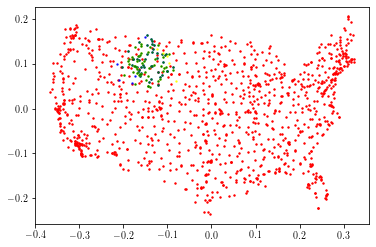

In [11]:
plt.scatter(data[:, 0], data[:, 1], s=2, c='red')
i = 0
j = 2
patch_i = patch_indices[i]
patch_j = patch_indices[j]
common_nodes = list(set(patch_i).intersection(set(patch_j)))
rot_mat_i = get_rotation_matrix(angles_gt[i]) # rotation matrix
rot_mat_j = get_rotation_matrix(angles_gt[j])
noisy_patch_i = data[patch_indices[i]].copy()
noisy_patch_i[:, 0] += added_noise_x[i]
noisy_patch_i[:, 1] += added_noise_y[i]
noisy_patch_j = data[patch_indices[j]].copy()
noisy_patch_j[:, 0] += added_noise_x[j]
noisy_patch_j[:, 1] += added_noise_y[j]
idx_i_sorted = np.argsort(patch_i)
common_nodes_pos = np.searchsorted(patch_i[idx_i_sorted], common_nodes)
indices_i = idx_i_sorted[common_nodes_pos]
idx_j_sorted = np.argsort(patch_j)
common_nodes_pos = np.searchsorted(patch_j[idx_j_sorted], common_nodes)
indices_j = idx_j_sorted[common_nodes_pos]
i = 0
noisy_patch_i = data[patch_indices[i]].copy()
noisy_patch_i[:, 0] += added_noise_x[i]
noisy_patch_i[:, 1] += added_noise_y[i]
rotated_coordinates = np.dot(get_rotation_matrix(angles_gt[i]), noisy_patch_i.T).T
plt.scatter(rotated_coordinates[:, 0], rotated_coordinates[:, 1], s=2, alpha=0.8, c='blue')
plt.scatter(rotated_coordinates[indices_i, 0], rotated_coordinates[indices_i, 1], s=2, alpha=0.8, c='green')
i = 2
noisy_patch_i = data[patch_indices[i]].copy()
noisy_patch_i[:, 0] += added_noise_x[i]
noisy_patch_i[:, 1] += added_noise_y[i]
rotated_coordinates = np.dot(get_rotation_matrix(angles_gt[i]), noisy_patch_i.T).T
plt.scatter(rotated_coordinates[:, 0], rotated_coordinates[:, 1], s=2, alpha=0.8, c='yellow')
plt.scatter(rotated_coordinates[indices_j, 0], rotated_coordinates[indices_j, 1], s=2, alpha=0.8, c='green')
plt.savefig('../uscities_pipeline_plots/us_rorated_k50_thres6_100eta'+str(int(100*eta))+'patch0_1.pdf', format='pdf')
plt.show()

3.016713 [3.04469152]
3.0504348 [3.10239557]


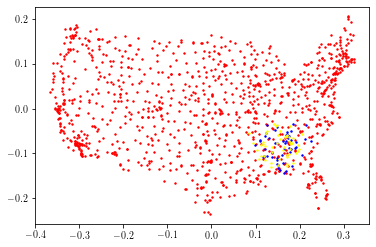

In [12]:
plt.scatter(data[:, 0], data[:, 1], s=2, c='red')
i = 0
noisy_patch_i = data[patch_indices[i]].copy()
noisy_patch_i[:, 0] += added_noise_x[i]
noisy_patch_i[:, 1] += added_noise_y[i]
rotated_coordinates = np.dot(get_rotation_matrix(angles_gt[i]), noisy_patch_i.T).T
rotated_coordinates = np.dot(get_rotation_matrix(-angles_pred[i]), rotated_coordinates.T).T
plt.scatter(rotated_coordinates[:, 0], rotated_coordinates[:, 1], s=2, c='blue')
print(angles_pred[i], angles_gt[i])
i = 2
noisy_patch_i = data[patch_indices[i]].copy()
noisy_patch_i[:, 0] += added_noise_x[i]
noisy_patch_i[:, 1] += added_noise_y[i]
rotated_coordinates = np.dot(get_rotation_matrix(angles_gt[i]), noisy_patch_i.T).T
rotated_coordinates = np.dot(get_rotation_matrix(-angles_pred[i]), rotated_coordinates.T).T
plt.scatter(rotated_coordinates[:, 0], rotated_coordinates[:, 1], s=2, c='yellow')
print(angles_pred[i], angles_gt[i])
plt.savefig('../uscities_pipeline_plots/us_recovered_k50_thres6_100eta'+str(int(100*eta))+'patch0_1.pdf', format='pdf')
plt.show()

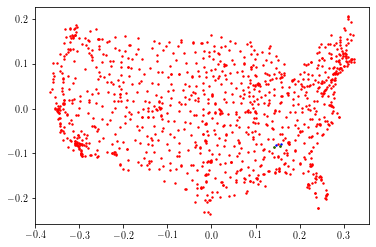

In [18]:
count_vec = np.zeros(num_nodes)
x_sum_vec = np.zeros(num_nodes)
y_sum_vec = np.zeros(num_nodes)
for patch_idx in range(num_nodes):
    indices_in_patch = patch_indices[patch_idx]
    count_vec[indices_in_patch] += 1
    noisy_patch = data[indices_in_patch].copy()
    noisy_patch[:, 0] += added_noise_x[patch_idx]
    noisy_patch[:, 1] += added_noise_y[patch_idx]
    rotated_coordinates = np.dot(get_rotation_matrix(angles_gt[patch_idx]-angles_pred[patch_idx]), noisy_patch.T).T
    x_sum_vec[indices_in_patch] += rotated_coordinates[:, 0]
    y_sum_vec[indices_in_patch] += rotated_coordinates[:, 1]
x_vec = x_sum_vec / count_vec
y_vec = y_sum_vec / count_vec
plt.scatter(data[:, 0], data[:, 1], s=2, c='red')
plt.scatter(x_vec[[0,2]], y_vec[[0,2]], s=2, c='blue')
plt.scatter(data[[0,2], 0], data[[0,2], 1], s=2, c='green')
plt.savefig('../uscities_pipeline_plots/us_recovered_points_k50_thres6_100eta'+str(int(100*eta))+'patch0_1.pdf', format='pdf')
plt.show()

In [19]:
print(angles_pred[0]/np.pi*180, angles_pred[2]/np.pi*180, (angles_pred[0]-angles_pred[2])/np.pi*180)
print(angles_gt[0]/np.pi*180, angles_gt[2]/np.pi*180, (angles_gt[0]-angles_gt[2])/np.pi*180)
print(adj_obs[0,2]/np.pi*180)

172.84491740050441 174.77704131291762 -1.932123912413207
[174.44797391] [177.7541724] [-3.30619849]
357.26255248377737


In [20]:
print(angles_pred[0], angles_pred[2], (angles_pred[0]-angles_pred[2]))
print(angles_gt[0], angles_gt[2], (angles_gt[0]-angles_gt[2]))
print(adj_obs[0,2])

3.016713 3.0504348 -0.033721924
[3.04469152] [3.10239557] [-0.05770405]
6.23540783492096


In [21]:
print(eta*data[:, 0].std(), eta*data[:, 1].std())

0.010270178089654962 0.004881495288928255
